In [1]:
import numpy as np
import pandas as pd
import string
import re

# digits, len == 0 remove 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

import contractions
import pkg_resources
from symspellpy import SymSpell
# Remove accented characters
# imports
import unicodedata

import nltk
# from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
Tokeniser = TweetTokenizer()
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amoghnigam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amoghnigam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amoghnigam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [170]:
# Importing the dataset
df = pd.read_csv('./Twitter_Data.csv')
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [171]:
# 162968
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])

Rows     : 162980
Columns  : 2


In [5]:
df.sample(10)

,clean_text,category
34475,the auction paintings from nirav modis collect...,0.0
75316,prode nation well you modi 2019 bhi apki jarur...,0.0
50813,goes modi one who has given for this,0.0
49782,how hard you all anti modi media try truth mod...,-1.0
84511,such announcements which has many fallouts can...,1.0
69496,‘need address gaps int’ space laws’\nfor more ...,1.0
143352,still the end narendra modis year ruling the c...,0.0
114190,modi predicts easy victory two weeks before po...,1.0
50318,modi reveals india successfully tested antisat...,1.0
89459,rajdeep shamedesai see can together nothing im...,-1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [6]:
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

In [8]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [9]:
df[df['category'].isnull()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [16]:
df[df['clean_text'].isnull()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [10]:
df[df.clean_text.duplicated(keep=False) == True]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [13]:
df.loc[df['clean_text'] == " "]

,clean_text,category
77224,,0.0


In [ ]:
# DROP AS VERY LESS
# 4+7+1 = 12

In [172]:
# make a function def clean
df.drop(df[df['clean_text'].isna()].index, inplace=True)
df.drop(df[df['category'].isna()].index, inplace=True)
df.drop(df[df['clean_text'] == " "].index, inplace = True)
df.reset_index(inplace=True, drop=True)

In [15]:
df.category.value_counts()

 1.0    72249
 0.0    55210
-1.0    35509
Name: category, dtype: int64

In [173]:
total = df.category.value_counts()
percentage=round(df.category.value_counts(normalize=True)*100,2)
pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])

,Total,Percentage
1.0,72249,44.33
0.0,55210,33.88
-1.0,35509,21.79


In [ ]:
# Insights

# 1. In this data, we have more than 40% positive tweets
# 2. Negative Tweets are with low numbers and only 50% in count compared to positive tweets
# 3. Neutral Tweets have a good number in total between positive & negative tweet count

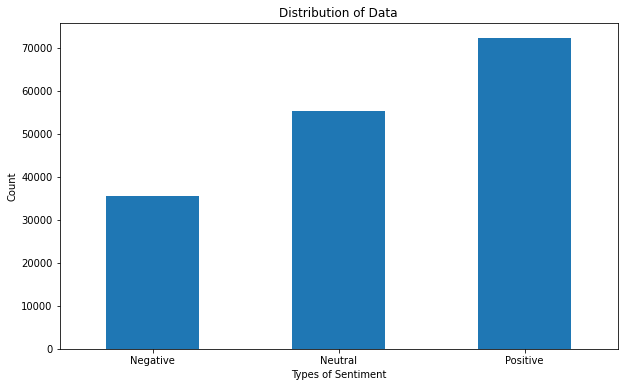

In [11]:
# plt.rcParams.update({"figure.figsize": (10, 6),
#               "figure.facecolor" : "white"
#              })
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = 'white'

ax = df.groupby('category').count().plot(kind='bar', title='Distribution of Data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
plt.ylabel('Count')
plt.xlabel('Types of Sentiment')

plt.show()

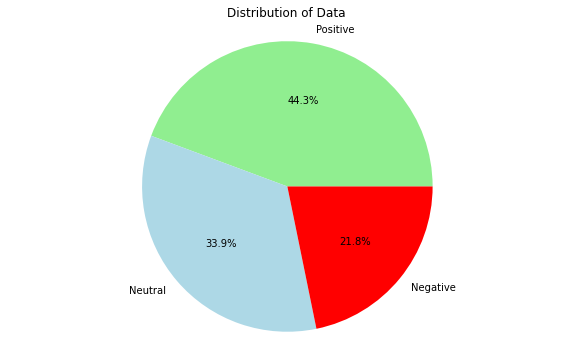

In [12]:
# fig, ax = plt.subplots()

plt.pie(percentage, labels=['Positive','Neutral','Negative'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'red'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Data')

plt.show()

In [ ]:
# Word count

In [174]:
df['word_counts']=df['clean_text'].apply(lambda x: len(str(x).split()))
df.head()

,clean_text,category,word_counts
0,when modi promised “minimum government maximum...,-1.0,33
1,talk all the nonsense and continue all the dra...,0.0,13
2,what did just say vote for modi welcome bjp t...,1.0,22
3,asking his supporters prefix chowkidar their n...,1.0,34
4,answer who among these the most powerful world...,1.0,14


In [175]:
df['chars_count']=df['clean_text'].apply(lambda x: len(x))
df.head()

,clean_text,category,word_counts,chars_count
0,when modi promised “minimum government maximum...,-1.0,33,210
1,talk all the nonsense and continue all the dra...,0.0,13,68
2,what did just say vote for modi welcome bjp t...,1.0,22,117
3,asking his supporters prefix chowkidar their n...,1.0,34,212
4,answer who among these the most powerful world...,1.0,14,81


In [36]:
df.describe()

,category,word_counts,chars_count
count,162968.000000,162968.000000,162968.000000
mean,0.225443,20.080826,124.179078
std,0.781282,10.879516,67.923552
min,-1.000000,1.000000,2.000000
25%,0.000000,11.000000,66.000000
50%,0.000000,18.000000,114.000000
75%,1.000000,29.000000,183.000000
max,1.000000,52.000000,274.000000


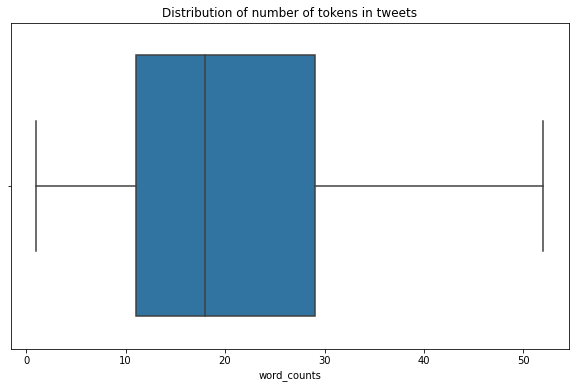

In [24]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = 'white'
plt.title('Distribution of number of tokens in tweets')
sns.boxplot(x = df['word_counts'])
plt.show()

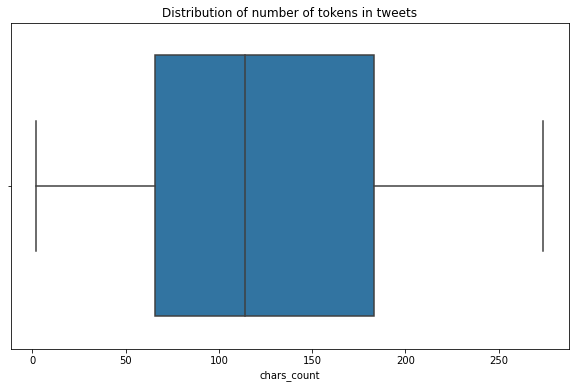

In [25]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = 'white'
plt.title('Distribution of number of tokens in tweets')
sns.boxplot(x = df['chars_count'])
plt.show()

In [178]:
texts_list, cat_list = list(df['clean_text']), list(df['category'])
df_negative = df[df["category"]==-1.0].copy()
df_positive = df[df["category"]==1.0].copy()
df_neutral = df[df["category"]==0.0].copy()

In [179]:
texts_len = [len(str(t).split()) for t in texts_list]

In [180]:
len(texts_list)

162968

In [183]:
def tokenised_sen(text):
    for i in range (len(text)):
        new = Tokeniser.tokenize(text[i])
        text[i] = " ".join(new)

In [184]:
texts_tokenised = texts_list.copy()

In [185]:
tokenised_sen(texts_tokenised)

In [ ]:
# EMOJI analysis

In [186]:
# import emot
import emoji
# emot_obj = emot.core.emot() 

In [187]:
def split_count(textm):
    emoji_list = []
    for i in textm:
        dic = emoji.emoji_list(i)
        if dic:
            emoji_list += [j['emoji'] for j in dic]
    return emoji_list

In [188]:
cat_emojis = {1.0: [], 0.0: [], -1.0: []}

for i, text in enumerate(texts_tokenised):
    emoji_count = split_count(text)
    if emoji_count:
        cat_emojis[df['category'].iloc[i]].extend(emoji_count)

				Top emojis for 1.0 
 ['✌', '❤', '⚡', '♂', '☺', '♥', '♀', '▪', '‼', '☝', '➡', '✅', '♦', '✔', '✋', '✊', '☹', '⏩', '❓', '☕']


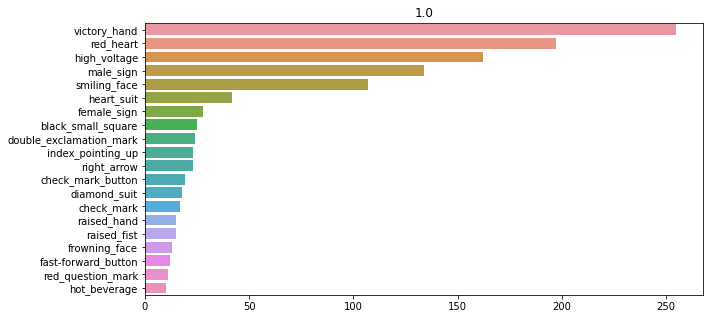

				Top emojis for 0.0 
 ['⚡', '✌', '❤', '♂', '☺', '♀', '✅', '☝', '⛔', '➡', '✊', '▪', '❣', '⏩', '‼', '⛳', '❓', '✈', '✋', '✔']


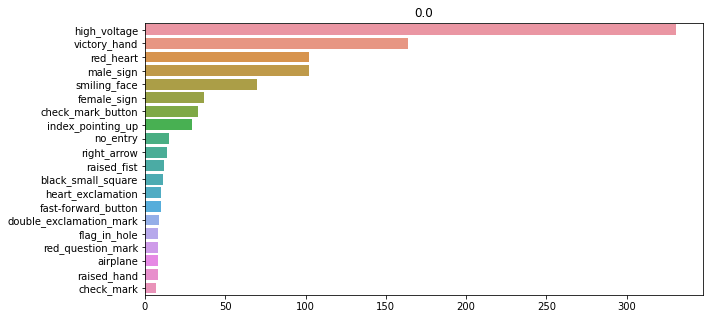

				Top emojis for -1.0 
 ['♂', '⚡', '♀', '✌', '☺', '❤', '▪', '✅', '✋', '⚠', '▶', '➡', '☝', '⛔', '❌', '❓', '‼', '❣', '⁉', '☹']


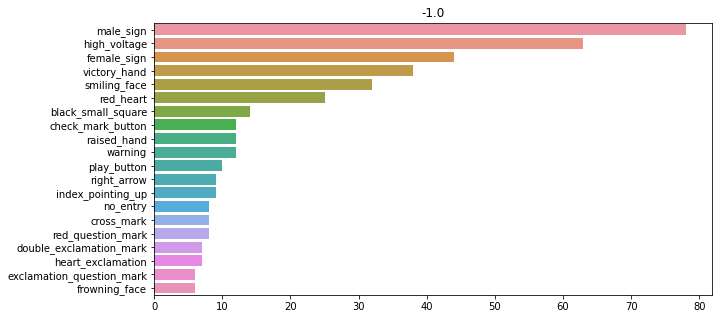

In [189]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = 'white'

for t, emote in cat_emojis.items():
    plt.figure(figsize=(10, 5))
    bar_info = pd.Series(emote).value_counts()[:20]
    print('============'*10,  f'\n\t\t\t\tTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.barplot(x=bar_info.values, y=bar_info.index)
    plt.title(f'{t}')
    plt.show()

In [ ]:
# 1. decode emoji
# 2. remove num/mentions/url/punc
# 0. lower
# 3. expand contractions
# # 4. translate
# 5. spell check
# 6. remove stopwords
# 7. remove extra spaces
# 8. Lemmatisation

In [190]:
sym_spell = SymSpell(max_dictionary_edit_distance=3)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [217]:
# stp_words = stopwords.words('english') + list(STOPWORDS)

In [220]:
stp_words = stopwords.words('english')

In [219]:
stopWords_with_not = stp_words
print(stopWords_with_not)
# append "shall"

# try remove not then model analysis 
# with not removing not then model analysis 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [82]:
stopWords_with_not.extend(['shall'])
print(stopWords_with_not)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [81]:
stopWords_without_not = stp_words
stopWords_without_not.remove('not')
# stopWords_without_not.remove("not")
# stopWords_without_not.remove("cannot")
print(stopWords_without_not)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [83]:
stopWords_without_not.extend(['shall'])
print(stopWords_without_not)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [222]:
negations_dic = {"isn't": 'is not', "aren't": 'are not', "wasn't": 'was not', "weren't": 'were not', 
                 "needn't": 'need not', "haven't": 'have not', "hasn't": 'has not', "hadn't": 'had not', 
                 "won't": 'will not', "shan't": 'shall not', "wouldn't": 'would not', "don't": 'do not', 
                 "doesn't": 'does not', "didn't": 'did not', "can't": 'can not', "couldn't": 'could not', 
                 "shouldn't": 'should not', "mightn't": 'might not', "mustn't": 'must not', 'isnt': 'is not', 
                 'arent': 'are not', 'wasnt': 'was not', 'werent': 'were not', 'neednt': 'need not', 'havent': 
                 'have not', 'hasnt': 'has not', 'hadnt': 'had not', 'wont': 'will not', 'shant': 'shall not', 
                 'wouldnt': 'would not', 'dont': 'do not', 'doesnt': 'does not', 'didnt': 'did not', 
                 'cant': 'can not', 'couldnt': 'could not', 'shouldnt': 'should not', 'mightnt': 'might not', 
                 'mustnt': 'must not'}

contraction = {'cuz':'because', 'abt':'about'}

def combine_tokens(tokenized): 
    non_tokenized = ' '.join([w for w in tokenized])
    return non_tokenized

def make_tokens(text):
    return Tokeniser.tokenize(text)

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [227]:
# DATA CLEANING
# Remove mentions 
regex_mentions = r"@[^\s]+"
# Remove links -> URL
regex_links = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
# Remove some special characters
regex_special = r"[^A-Z a-z ]+"
# 161335
# Remove Email -> mail -> 0
regex_email = r"([a-zA-Z0-9+_-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)"
# Remove repeated sequence of letters
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1"
# remove html
# from bs4 import BeautifulSoup
# df['clean_text']=df['clean_text'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())
def decode_emojis(texts):
#     print('Decoding emojis...')
    return emoji.demojize(texts, language='en', delimiters = (" "," "))

def regex_text(texts):
    texts = re.sub(regex_email, " ", texts.lower())
    texts = re.sub(regex_mentions, " ", texts.lower())
    texts = re.sub(regex_links, " ", texts.lower())
    texts = re.sub(regex_special, " ", texts.lower())
    texts = re.sub(sequencePattern, seqReplacePattern, texts.lower())
    return texts

# function to remove accented characters
def remove_acc_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

def expand_contractions(text):
    for key in contraction:
        value=contraction[key]
        text = text.replace(key,value)
    new_text = contractions.fix(text)
    return new_text

def spellchecker(texts):
    texts = sym_spell.word_segmentation(texts)
    return texts.corrected_string

def rem_stopwords(texts,stop_words):
    tokenized = make_tokens(texts)
    tokenized = [token for token in tokenized if token not in stop_words]
    texts = combine_tokens(tokenized)
    return texts

def remove_double_space(texts):
    pattern = re.compile(' +')
    return re.sub(pattern, ' ', texts)

def lemmatise(text):
    tokenized = make_tokens(text)
#     lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokenized]
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    return tokenized

# def lang_to_eng(texts)

In [166]:
df2 = df.copy()

In [ ]:
# 1. decode emoji
# 2. remove num/mentions/url/punc
# 0. lower
# 3. expand contractions
# # 4. translate
# # 5. spell check
# 6. remove stopwords
# 7. remove extra spaces
# 8. Lemmatisation

In [228]:
import time
start_time = time.time()
df2['post_clean'] = df2['clean_text'].apply(lambda x: decode_emojis(x))
df2['post_clean'] = df2['post_clean'].apply(lambda x: x.lower())
df2['post_clean'] = df2['post_clean'].apply(lambda x: regex_text(x))
df2['post_clean'] = df2['post_clean'].apply(lambda x: remove_acc_chars(x))
df2['post_clean'] = df2['post_clean'].apply(lambda x: expand_contractions(x))
df2['post_clean'] = df2['post_clean'].apply(lambda x: remove_double_space(x))
stop_time = time.time()
print("Done")
# 1 min

Done


In [229]:
print(f'Expansion of all tweets takes ~{round((start_time-stop_time), 3)} seconds')

Expansion of all tweets takes ~-6.243 seconds


In [232]:
start_time = time.time()
# df2['post_clean'] = df2['post_clean'].apply(lambda x: spellchecker(x))
df2['post_clean'] = df2['post_clean'].apply(lambda x: rem_stopwords(x, stopWords_without_not))
df2['not_post_clean'] = df2['post_clean'].apply(lambda x: rem_stopwords(x, stopWords_with_not))

df2['post_clean'] = df2['post_clean'].apply(lambda x: remove_double_space(x))
df2['not_post_clean'] = df2['not_post_clean'].apply(lambda x: remove_double_space(x))

df2['post_clean'] = df2['post_clean'].apply(lambda x: lemmatise(x))
df2['post_clean'] = df2['post_clean'].apply(lambda x: combine_tokens(x))

df2['not_post_clean'] = df2['not_post_clean'].apply(lambda x: lemmatise(x))
df2['not_post_clean'] = df2['not_post_clean'].apply(lambda x: combine_tokens(x))
stop_time = time.time()
print("Done")
# 5 min

Done


In [233]:
print(f'Lemmatisation of all tweets takes ~{round((start_time-stop_time), 3)} seconds')

Lemmatisation of all tweets takes ~-270.765 seconds


In [234]:
df2.to_csv('clean_tweet.csv', header=True, index=False)

In [235]:
df = pd.read_csv('./clean_tweet.csv')
df

,clean_text,category,word_counts,chars_count,post_clean,not_post_clean
0,when modi promised “minimum government maximum...,-1.0,33,210,modi promise minimum government maximum govern...,modi promise minimum government maximum govern...
1,talk all the nonsense and continue all the dra...,0.0,13,68,talk nonsense continue drama vote modi,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,22,117,say vote modi welcome bjp told rahul main camp...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,34,212,ask supporter prefix chowkidar name modi great...,ask supporter prefix chowkidar name modi great...
4,answer who among these the most powerful world...,1.0,14,81,answer among powerful world leader today trump...,answer among powerful world leader today trump...
...,...,...,...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,-1.0,18,108,crore paid neerav modi not recover congress le...,crore paid neerav modi recover congress leader...
162964,dear rss terrorist payal gawar what about modi...,-1.0,36,248,dear terrorist payal gawar modi kill plus musl...,dear terrorist payal gawar modi kill plus musl...
162965,did you cover her interaction forum where she ...,0.0,9,51,cover interaction forum left,cover interaction forum left
162966,there big project came into india modi dream p...,0.0,13,77,big project come india modi dream project not ...,big project come india modi dream project happ...


In [243]:
df['clean_text'][156571]

'award wapsi gang never returned any prize money modi '

In [241]:
df['post_clean'][162800]

'award wapsi gang never return prize money modi'

In [171]:
df['clean_text'][3521]

'author encyclopedia sitemodi sharif befriend pak army frowns'

In [38]:
cat_list[3521]

0.0

In [179]:
df['clean_text'][353]

'want modi sir prime minister for long time now proved that including him too many people are against modi sir his thinking proved that thinking only for himself and his benefit'